# Time Series Visualization

In [1]:
import pandas as pd

df = pd.read_csv("BANK.csv")
df.head()


,Date,AXIS,ICICI
0,"Feb 26, 2018",552.30,327.05
1,"Feb 27, 2018",538.40,322.15
2,"Feb 28, 2018",528.75,313.25
3,"Mar 01, 2018",525.75,304.95
4,"Mar 05, 2018",524.55,303.35


In [2]:
df.isna().sum()

Date     0
AXIS     0
ICICI    0
dtype: int64

In [3]:
df.dtypes

Date      object
AXIS     float64
ICICI    float64
dtype: object

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date     datetime64[ns]
AXIS            float64
ICICI           float64
dtype: object

In [5]:
# Making the date column the index
df.set_index("Date", inplace=True)
df.head()

,AXIS,ICICI
Date,,
2018-02-26,552.30,327.05
2018-02-27,538.40,322.15
2018-02-28,528.75,313.25
2018-03-01,525.75,304.95
2018-03-05,524.55,303.35


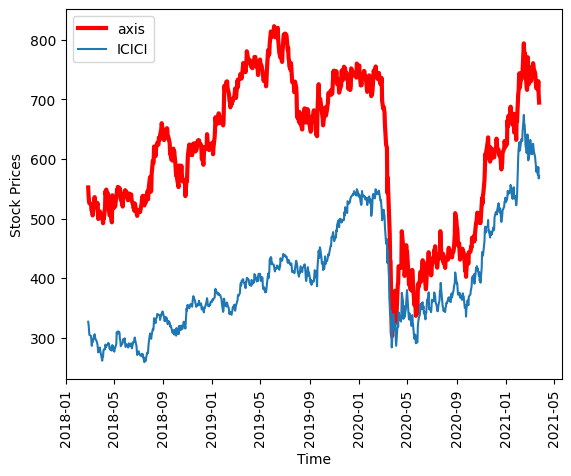

In [6]:
## importing matplotlib module
import matplotlib.pyplot as plt

#declaration of figure and axis: OOP
fig, ax = plt.subplots()

#line plt bw time and axis bank prices
ax.plot(df.index, df["AXIS"], color='r', linewidth=3,label="axis") #x-axis is index (date-time)

#line plot bw time and ICICI bank prices
ax.plot(df.index, df["ICICI"],label="ICICI")

ax.set_xlabel('Time')
plt.xticks(rotation=90) # used because dates are many and overlaping
ax.set_ylabel('Stock Prices')
ax.legend()
plt.show()

In [7]:
df_subset = df["26-Feb-2018":"25-March-2019"]

print(df_subset)

              AXIS   ICICI
Date                      
2018-02-26  552.30  327.05
2018-02-27  538.40  322.15
2018-02-28  528.75  313.25
2018-03-01  525.75  304.95
2018-03-05  524.55  303.35
...            ...     ...
2019-03-18  751.60  398.05
2019-03-19  760.90  398.40
2019-03-20  755.75  392.90
2019-03-22  757.05  391.80
2019-03-25  745.70  383.50

[266 rows x 2 columns]


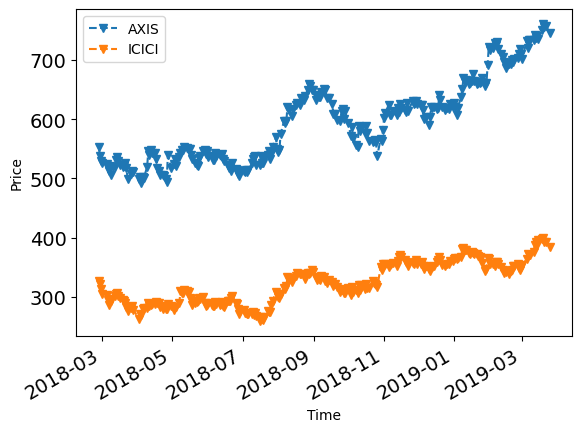

In [8]:
#pandas visualization
ax=df_subset.plot(fontsize=14,marker="v", linestyle="--") # directly feed dataframe if index is date-time
ax.set_xlabel('Time')
ax.set_ylabel('Price')

plt.show()

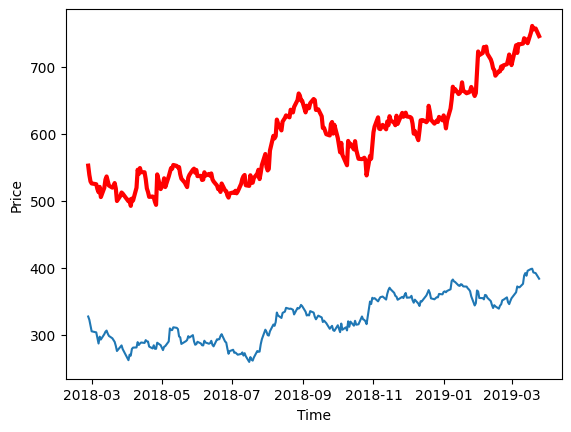

In [9]:
fig, ax = plt.subplots()

ax.plot(df_subset.index, df_subset["AXIS"], color='r', linewidth=3)

ax.plot(df_subset.index, df_subset["ICICI"])

ax.set_xlabel('Time')
ax.set_ylabel('Price')

plt.show()

In [10]:
#year based slicing
df_subset1 = df["2018":"2019"]

print(df_subset1)

              AXIS   ICICI
Date                      
2018-02-26  552.30  327.05
2018-02-27  538.40  322.15
2018-02-28  528.75  313.25
2018-03-01  525.75  304.95
2018-03-05  524.55  303.35
...            ...     ...
2019-12-24  740.65  541.10
2019-12-26  736.50  538.75
2019-12-27  760.15  549.40
2019-12-30  754.10  543.95
2019-12-31  754.10  538.90

[453 rows x 2 columns]


C:\Users\Aman\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\axis.py:1822: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self._converter.convert(x, self.units, self)
C:\Users\Aman\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\axis.py:1822: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self._converter.convert(x, self.units, self)


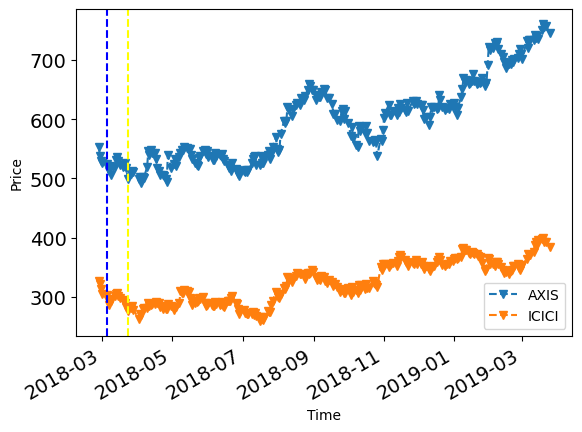

In [11]:
ax=df_subset.plot(fontsize=14,marker="v", linestyle="--")
ax.set_xlabel('Time')
ax.set_ylabel('Price')

ax.axvline('05-March-18', color='blue', linestyle='--') #vertical lines

ax.axvline('23-March-18', color='yellow', linestyle='--')

plt.show()

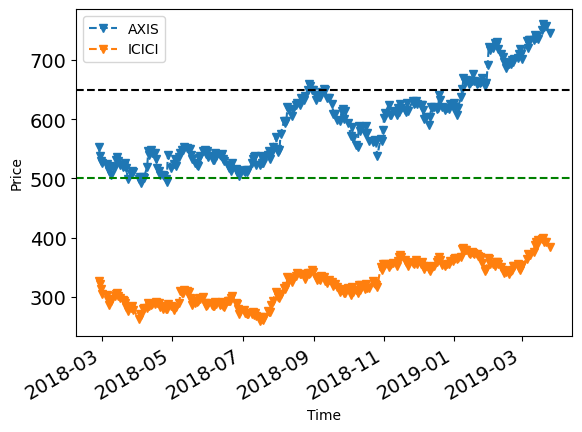

In [12]:
ax=df_subset.plot(fontsize=14,marker="v", linestyle="--")
ax.set_xlabel('Time')
ax.set_ylabel('Price')

ax.axhline(500, color='green', linestyle='--') # horizontal lines

ax.axhline(650, color='k', linestyle='--')

plt.show()

C:\Users\Aman\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\axis.py:1822: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self._converter.convert(x, self.units, self)


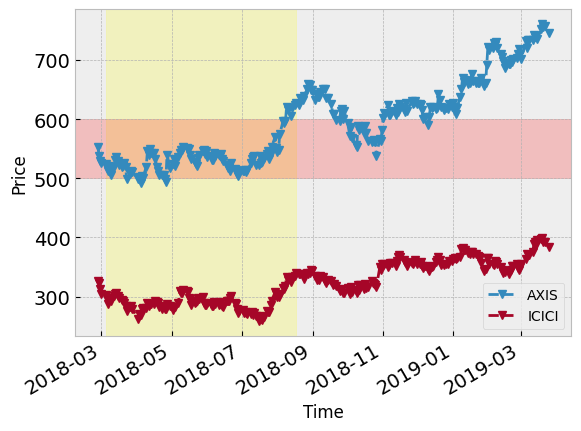

In [13]:
plt.style.use('bmh') # assigning a background style

ax=df_subset.plot(fontsize=14,marker="v", linestyle="--")
ax.set_xlabel('Time')
ax.set_ylabel('Price')

ax.axvspan('05-March-18','17-August-18',color='yellow', alpha=0.2)

ax.axhspan(500,600,color='red', alpha=0.2)

plt.show()

### Twin Axis

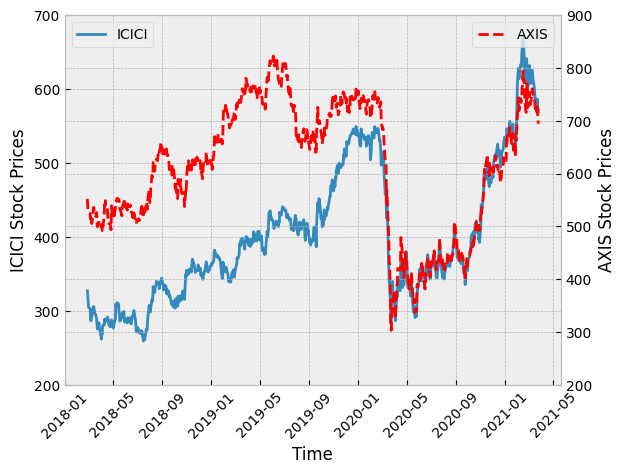

In [14]:
#Using twin axes with different left and right scales
# here the df's range is comparable so the scale difference doesn't show properly but useful for large gap range

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#first line plot
ax.plot(df.index, df["ICICI"],label="ICICI")

ax.set_xlabel('Time')
ax.set_ylabel('ICICI Stock Prices') #left y abels
ax.set_ylim(200, 700)
ax.legend()
plt.xticks(rotation=45)

ax2 = ax.twinx()

ax2.plot(df.index, df["AXIS"],color="red",linestyle="--",label="AXIS") #Separating variables by color
ax2.set_ylabel('AXIS Stock Prices') #right y labels
ax2.set_ylim(200, 900)
ax2.legend()
plt.show()

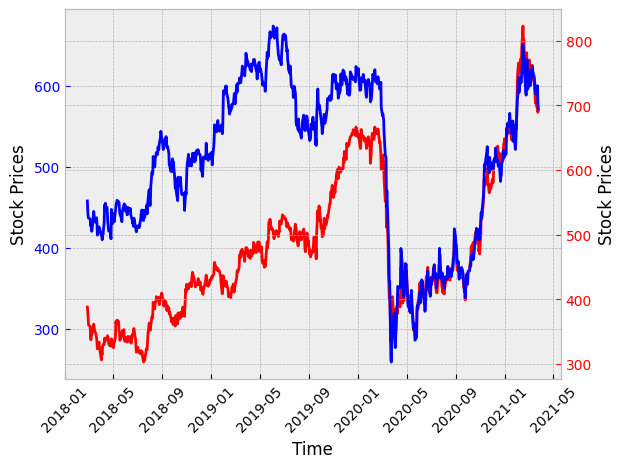

In [15]:
#Coloring the ticks

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(df.index, df["ICICI"],color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Stock Prices')
ax.tick_params('y', colors='blue')

ax2 = ax.twinx()

ax2.plot(df.index, df["AXIS"],color='blue')
ax2.set_ylabel('Stock Prices')
ax2.tick_params('y', colors='red')

ax.tick_params('x', rotation=45)

plt.show()

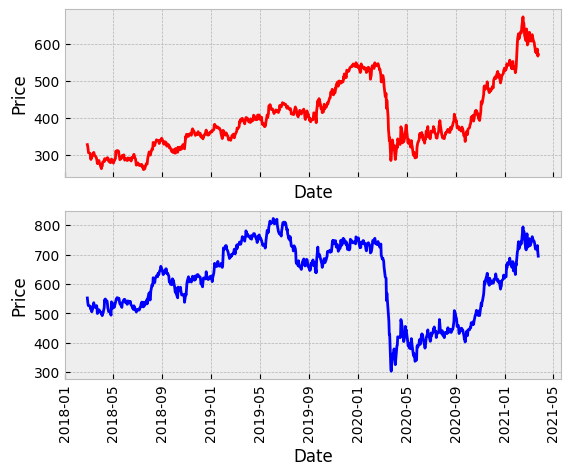

In [16]:
# Sub-Griding
plt.subplots
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df.index,df["ICICI"], color='r')
ax[1].plot(df.index,df["AXIS"], color='b')

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')

plt.tick_params('x', rotation=90)
plt.show()